In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
%matplotlib inline
import scipy.stats as norm
import seaborn as sns
import io
import requests
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, auc

In [ ]:
url='https://github.com/dsrscientist/dataset1/commit/069bd564d188a6345a426da5d42bce289362d7ec'
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [49]:
heart=pd.read_csv('heartdisease_data.csv')




# Attribute Information:#

##Only 14 attributes used:
1. #3 (age)age in years
2. #4 (sex)  (1 = male; 0 = female)
3. #9 (cp)9 cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
4. #10 (trestbps) resting blood pressure (in mm Hg on admission to the hospital)
5. #12 (chol)serum cholestoral in mg/dl
6. #16 (fbs) fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. #19 (restecg)resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. #32 (thalach)maximum heart rate achieved
9. #38 (exang)exercise induced angina (1 = yes; 0 = no)
10. #40 (oldpeak)oldpeak = ST depression induced by exercise relative to rest
11. #41 (slope)41 slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
12. #44 (ca)44 ca: number of major vessels (0-3) colored by flourosopy
13. #51 (thal)51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. #58 (num) (the predicted attribute)diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)#

In [51]:
HR=heart.rename(columns={'63':'Age','1':'Sex','4':'Cp','140':'Trestbps','260':'Chol','0':'Fbs','1.1':'Restecg','112':'Thalach','1.2':'Exang','3':'Oldpeak','2':'Slope','?':'Ca','?.1':'Thal','2.1':'Num'})

In [52]:
HR

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
5,65,1,4,150,236,1,1,105,1,0,?,?,?,3
6,60,1,3,180,0,0,1,140,1,1.5,2,?,?,0
7,60,1,3,120,0,?,0,141,1,2,1,?,?,3
8,60,1,2,160,267,1,1,157,0,0.5,2,?,?,1
9,56,1,2,126,166,0,1,140,0,0,?,?,?,0


In [58]:
heart.isnull().sum()

63     0
1      0
4      0
140    0
260    0
0      0
1.1    0
112    0
1.2    0
3      0
2      0
?      0
?.1    0
2.1    0
dtype: int64

In [55]:
heart.describe()

,63,1,4,1.1,2.1
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,59.331658,0.969849,3.502513,0.733668,1.517588
std,7.827080,0.171433,0.796928,0.684918,1.222038
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


In [37]:
heart=pd.DataFrame(columns=('Age','Sex','Cp','Trestbps','Chol','Fbs','Restecg','Thalach','Exang','Oldpeak','Slope','Ca','Thal','Num'))

In [66]:
df=HR.drop(['Ca','Thal'],axis=1)

In [67]:
df['Slope'].value_counts()

?    102
2     52
3     29
1     16
Name: Slope, dtype: int64

In [68]:
#df = df[df.columns.drop(list(df.filter(regex='Test')))]
df=df.drop(['Slope'],axis=1)

In [69]:
df

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Num
0,44,1,4,130,209,0,1,127,0,0,0
1,60,1,4,132,218,0,1,140,1,1.5,2
2,55,1,4,142,228,0,1,149,1,2.5,1
3,66,1,3,110,213,1,2,99,1,1.3,0
4,66,1,3,120,0,0,1,120,0,-0.5,0
5,65,1,4,150,236,1,1,105,1,0,3
6,60,1,3,180,0,0,1,140,1,1.5,0
7,60,1,3,120,0,?,0,141,1,2,3
8,60,1,2,160,267,1,1,157,0,0.5,1
9,56,1,2,126,166,0,1,140,0,0,0


In [93]:
#df = df[df.OldPeak != ?]
#df_filtered=df != ?
print(df['Age'].value_counts())
print(df['Sex'].value_counts())
print(df['Cp'].value_counts())
print(df['Trestbps'].value_counts())
print(df['Chol'].value_counts())

print(df['Fbs'].value_counts())
print(df['Restecg'].value_counts())
print(df['Thalach'].value_counts())
print(df['Exang'].value_counts())
print(df['Oldpeak'].value_counts())
print(df['Num'].value_counts())


63    10
58     9
55     9
62     9
60     8
57     8
61     7
64     7
56     6
59     6
67     4
54     4
75     3
53     3
74     3
65     3
66     3
68     3
69     3
52     2
51     2
40     2
41     2
46     2
38     1
43     1
44     1
77     1
48     1
49     1
50     1
70     1
71     1
72     1
37     1
Name: Age, dtype: int64
1    124
0      5
Name: Sex, dtype: int64
4    97
3    22
2     7
1     3
Name: Cp, dtype: int64
120    15
130    14
150     9
110     7
140     7
160     7
122     6
142     5
128     4
144     4
126     4
136     4
170     4
132     3
134     3
158     3
124     3
116     2
138     2
125     2
180     2
152     2
0       1
156     1
178     1
114     1
104     1
127     1
106     1
190     1
100     1
154     1
112     1
155     1
172     1
146     1
135     1
96      1
118     1
Name: Trestbps, dtype: int64
0      33
220     4
258     3
310     3
223     3
254     3
219     3
186     3
171     2
214     2
267     2
270     2
236     2
213     2
203  

In [88]:
df=df[df.Trestbps != '?']
df=df[df.Chol != '?']
df=df[df.Fbs != '?']
df=df[df.Oldpeak != '?']

In [90]:
df

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Num
0,44,1,4,130,209,0,1,127,0,0,0
1,60,1,4,132,218,0,1,140,1,1.5,2
2,55,1,4,142,228,0,1,149,1,2.5,1
3,66,1,3,110,213,1,2,99,1,1.3,0
4,66,1,3,120,0,0,1,120,0,-0.5,0
5,65,1,4,150,236,1,1,105,1,0,3
6,60,1,3,180,0,0,1,140,1,1.5,0
8,60,1,2,160,267,1,1,157,0,0.5,1
9,56,1,2,126,166,0,1,140,0,0,0
10,59,1,4,140,0,0,1,117,1,1,1


In [94]:
df.describe()

,Age,Sex,Cp,Restecg,Num
count,129.000000,129.000000,129.000000,129.000000,129.000000
mean,59.372093,0.961240,3.651163,0.713178,1.550388
std,7.795301,0.193774,0.692044,0.698143,1.185599
min,37.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,4.000000,0.000000,1.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


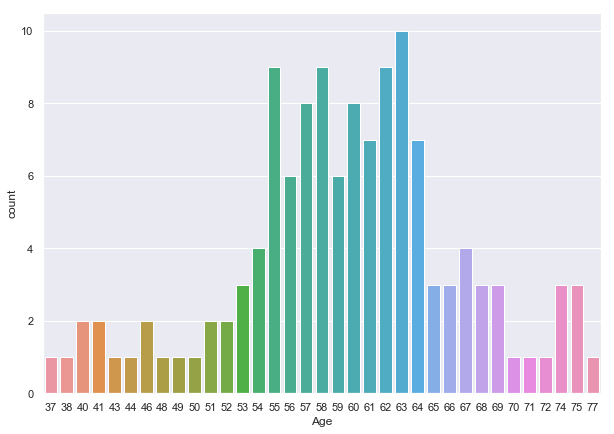

In [110]:
plt.figure(figsize=(10,7))
sns.set()
sns.countplot(df.Age);

In [168]:
minAge=min(df.Age)
maxAge=max(df.Age)
meanAge=df.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 37
Max Age : 77
Mean Age : 59.372093023255815


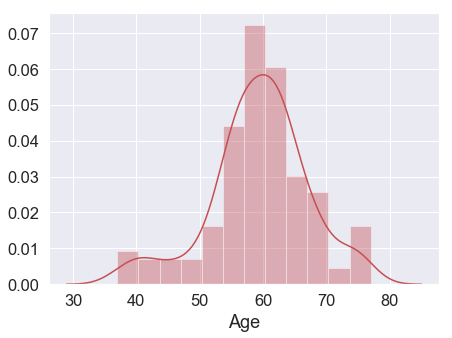

In [198]:
fig, axe = plt.subplots(figsize = [7, 5])
sns.distplot(df['Age'], color = 'r');

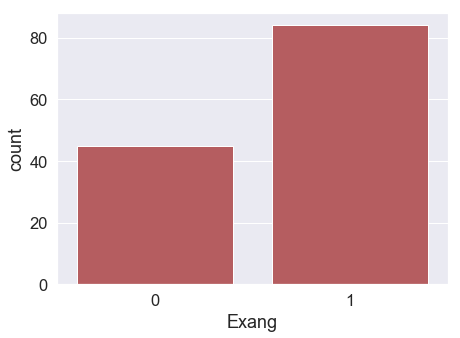

In [199]:
fig, axe = plt.subplots(figsize = [7, 5])
sns.countplot(df['Exang'], color = 'r');

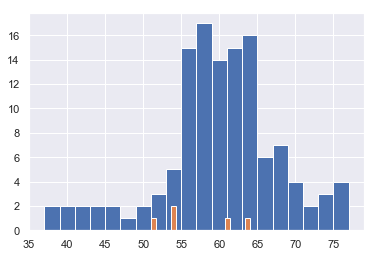

In [98]:
df[df.Sex==1].Age.hist(bins=20);
df[df.Sex==0].Age.hist(bins=20);

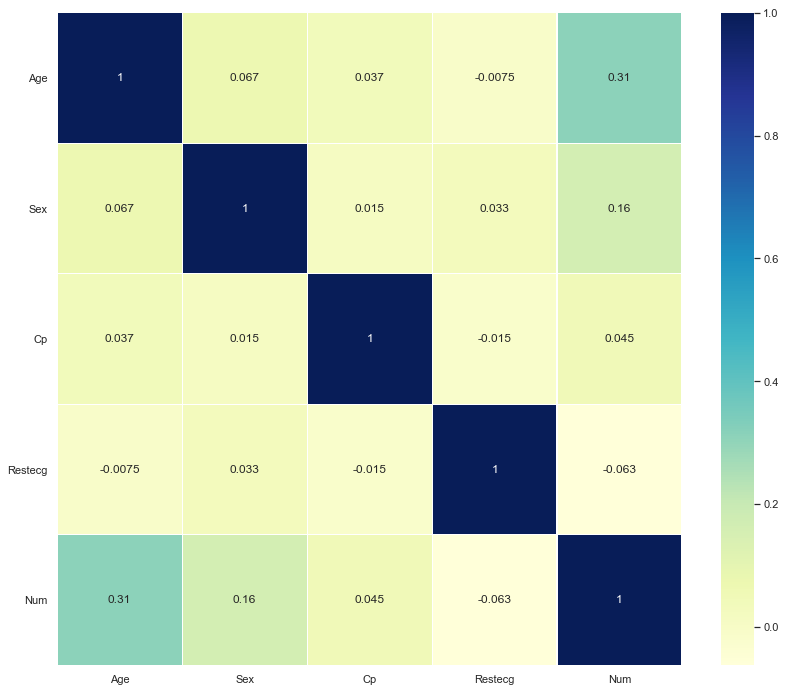

In [99]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

C:\Users\GT\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


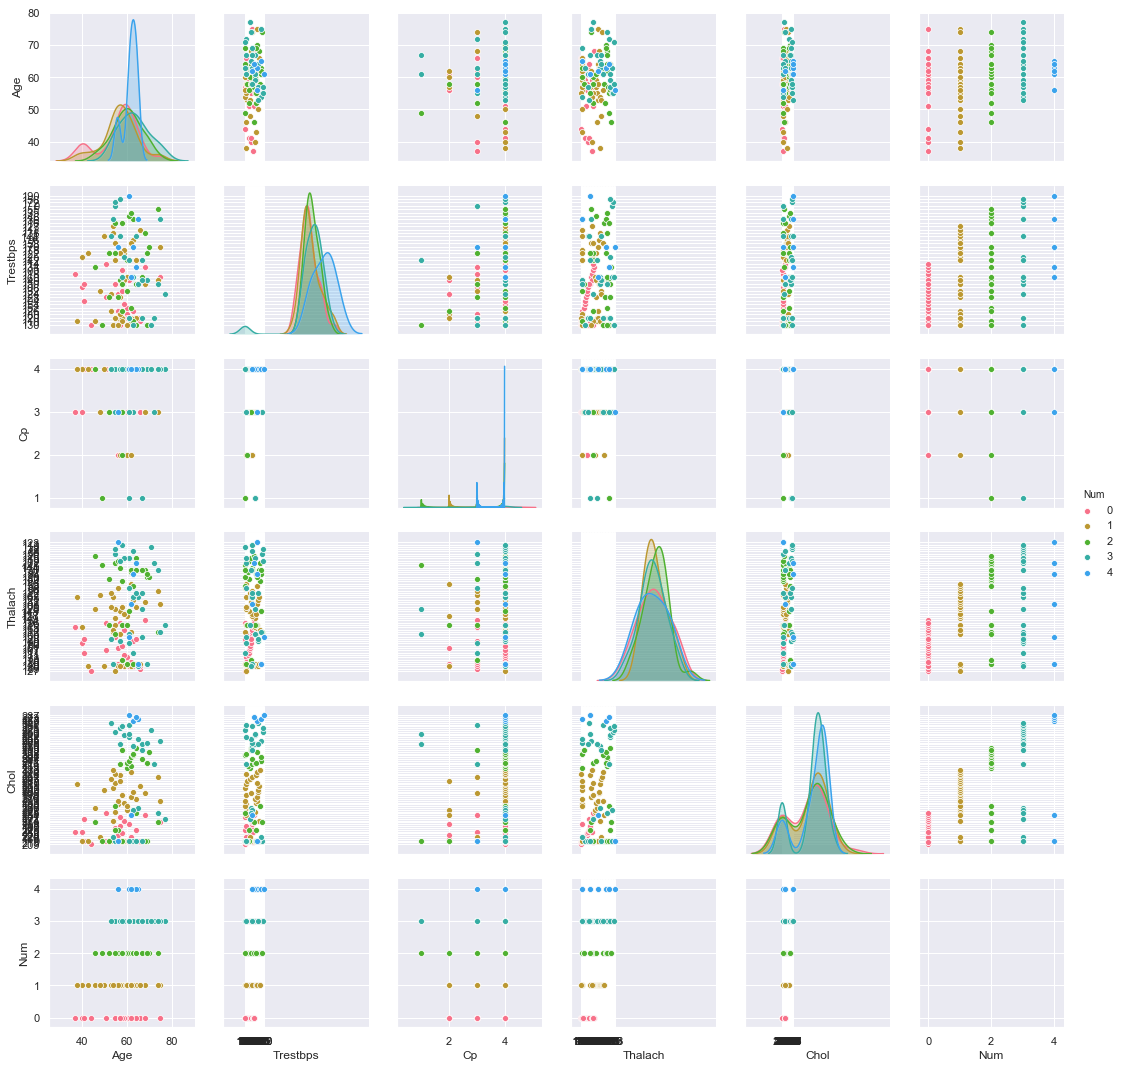

In [105]:
sns.pairplot(df[['Age','Trestbps', 'Cp', 'Thalach','Chol','Num']],hue='Num',
             palette = sns.color_palette("husl"), size=2.5)

In [106]:
df['Sex'].value_counts()/len(df)

1    0.96124
0    0.03876
Name: Sex, dtype: float64

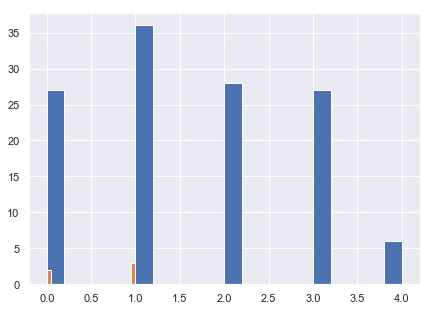

In [111]:
fig, axe = plt.subplots(figsize = [7, 5])
df[df.Sex==1].Num.hist(bins=20);
df[df.Sex==0].Num.hist(bins=20);


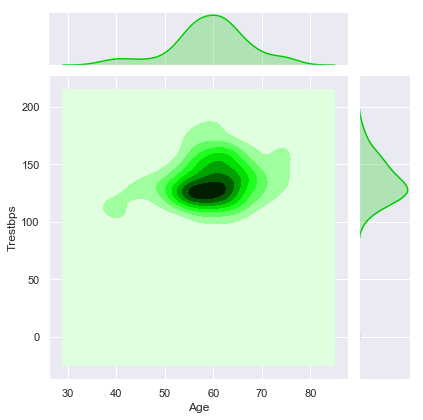

In [124]:
sns.jointplot(df.Age,df.Trestbps, color="#00cc00",kind='kde')#density plot

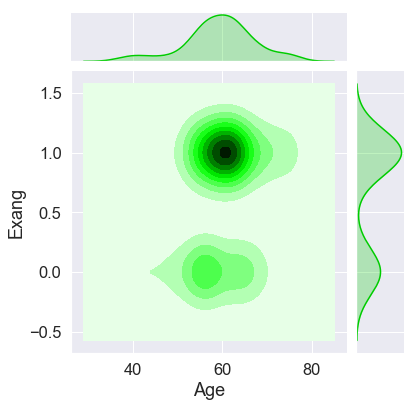

In [193]:
sns.jointplot(df.Age,df.Exang, color="#00cc00",kind='kde')#density plot

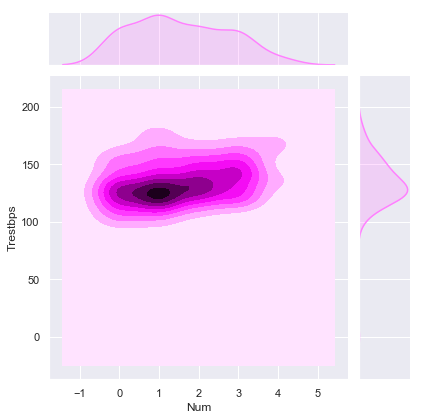

In [127]:
sns.jointplot(df.Num,df.Trestbps, color="#ff80ff",kind='kde')#density plot

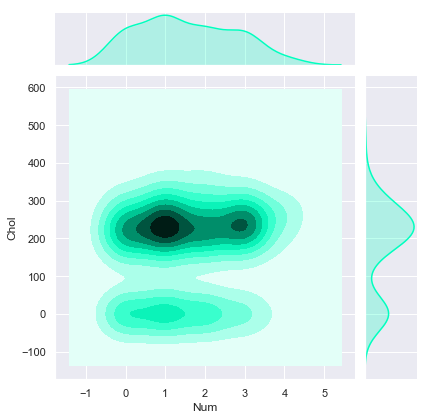

In [130]:
sns.jointplot(df.Num,df.Chol, color="#00ffbf",kind='kde')#density plot

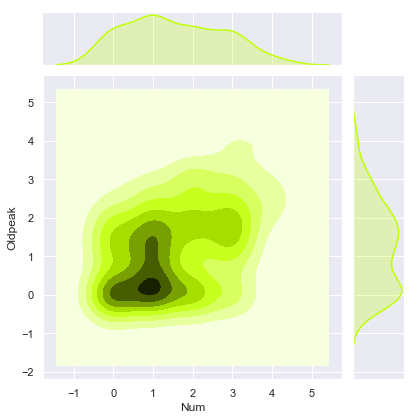

In [134]:
sns.jointplot(df.Num,df.Oldpeak, color="#bfff00",kind='kde')#density plot

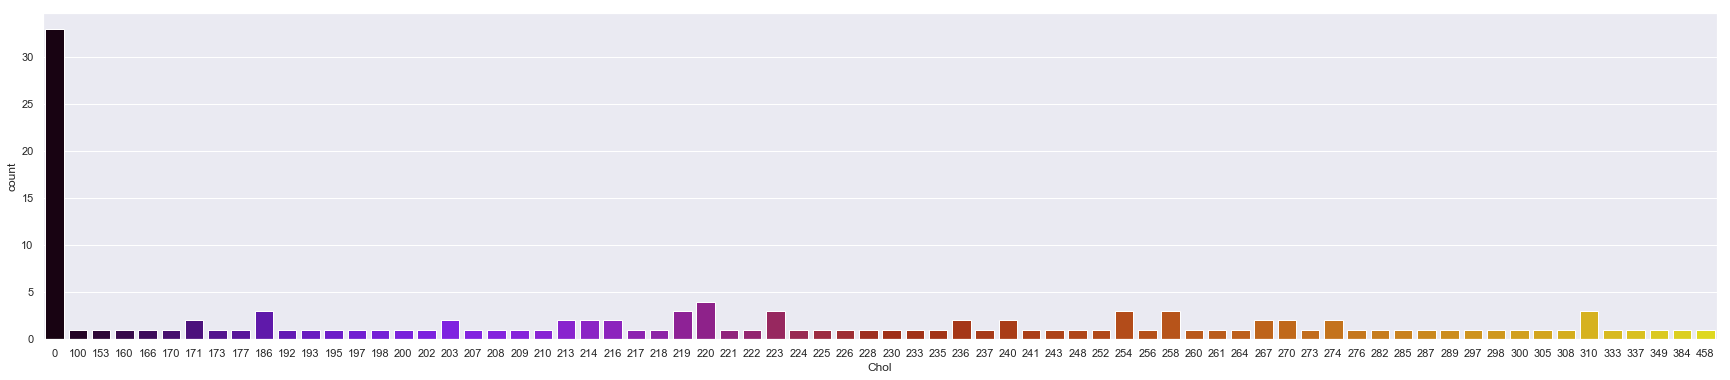

In [153]:
plt.rcParams['figure.figsize'] = (30,6)
sns.countplot(df['Chol'], palette = 'gnuplot')

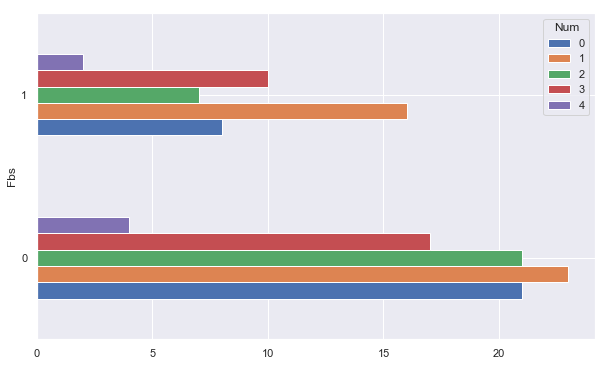

In [158]:
plt.rcParams['figure.figsize'] = (10,6)
pd.crosstab(df.Fbs,df.Num).plot(kind='barh');

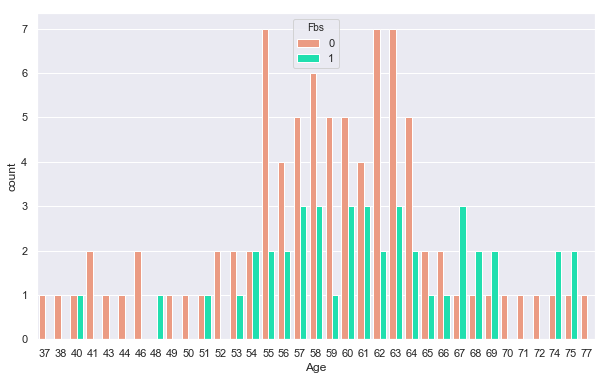

In [164]:
sns.countplot(x = "Age", hue = 'Fbs', data = df, palette=["#fc9272",         "#00ffbf"])

Text(0.5, 0, 'Restecg (0 = Normal, 1= having ST-T wave abnormality,2=definite left ventricular hypertrophy)')

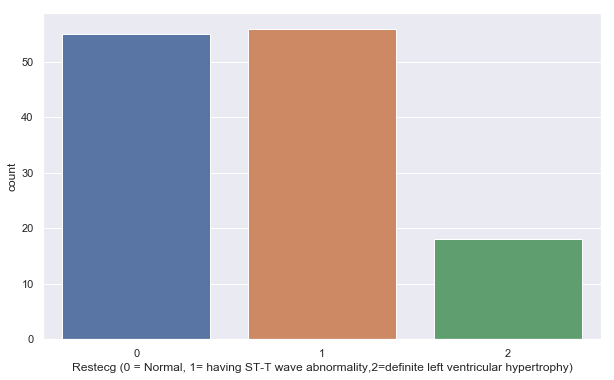

In [175]:
sns.countplot(x = "Restecg", data = df)
plt.xlabel("Restecg (0 = Normal, 1= having ST-T wave abnormality,2=definite left ventricular hypertrophy)")

Text(0.5, 0, 'Restecg (0 = Normal, 1= having ST-T wave abnormality,2=definite left ventricular hypertrophy)')

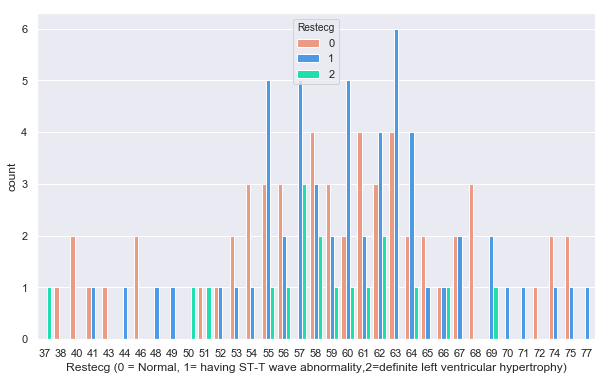

In [176]:
sns.countplot(x = "Age", hue = 'Restecg', data = df, palette=["#fc9272","#3399FF","#00ffbf"])
plt.xlabel("Sex (0 = female, 1= male)")
plt.xlabel("Restecg (0 = Normal, 1= having ST-T wave abnormality,2=definite left ventricular hypertrophy)")

In [212]:
cols = df.shape[1]
X = df.iloc[:, : cols - 1].values
y = df.iloc[:, cols - 1].values
scaler = StandardScaler()
X_ = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [213]:
lrc = LogisticRegression()
lrc.fit(X_train, y_train)
print("Logistics Regression accurary - training: ", lrc.score(X_train,y_train))
print("Logistics Regression accurary - test: ", lrc.score(X_test,y_test))

Logistics Regression accurary - training:  0.3786407766990291
Logistics Regression accurary - test:  0.38461538461538464


C:\Users\GT\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [205]:
X1_train,X1_test,y1_train,y1_test = train_test_split(\
            df[['Age','Sex','Cp','Thalach','Trestbps','Chol','Oldpeak','Restecg','Exang']], df.Num, test_size=0.2)

In [206]:
forest = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=4)
forest.fit(X1_train, y1_train)

RandomForestClassifier(max_depth=4)

In [218]:
labels = forest.predict(X1_test)
sns.set(font_scale=1.5)
auc = roc_auc_score(labels, y1_test)
fpr, tpr, thresholds = roc_curve(labels,y1_test)
print('ROC curve: AUC={0:0.2f}'.format(auc));

ValueError: multi_class must be in ('ovo', 'ovr')

In [214]:
y_scores_lr = lrc.decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(2, array([-0.24547823,  0.61211282,  0.39265872,  0.45045959, -1.2097529 ])),
 (1, array([ 1.04643238,  1.13785001,  0.89286691, -0.9287851 , -2.14836421])),
 (3, array([ 1.48706527,  1.10735251,  1.39974179, -0.3578387 , -3.63632087])),
 (3, array([ 1.32623366,  0.88904432,  1.25036046,  0.30293226, -3.7685707 ])),
 (1, array([ 0.35975938,  0.75010377,  0.55154566,  0.37711082, -2.03851964])),
 (2, array([ 0.2593189 ,  1.11861667, -0.23741673,  0.70672999, -1.84724882])),
 (1, array([ 1.07477634,  1.24770762,  0.73239864, -0.00607209, -3.04881051])),
 (0, array([-0.07459441,  1.06139533, -0.08160935, -1.6008285 ,  0.69563693])),
 (0, array([ 1.19999831,  1.01639975,  0.79167991,  0.4382521 , -3.44633008])),
 (3, array([  3.54181111,   1.55953377,   4.65515921,   0.36147018,
         -10.11797427])),
 (0, array([-0.95717581,  0.68507809, -0.78585809, -1.09448588,  2.15244169])),
 (2, array([ 0.40342255,  0.59590692,  0.93005261, -0.27940759, -1.64997449])),
 (3, array([ 1.78725919,  

In [215]:
y_proba_lr = lrc.predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(2, 0.30868012176569287),
 (1, 0.34972854952222876),
 (3, 0.24744944945285238),
 (3, 0.21980234062418977),
 (1, 0.30798496219444155),
 (2, 0.4175268749982629),
 (1, 0.365289965507771),
 (0, 0.4160725718371648),
 (0, 0.2798971715935139),
 (3, 0.03261355261866113),
 (0, 0.1686411954326423),
 (2, 0.2670783954759499),
 (3, 0.19181292347805975),
 (0, 0.19603551144799145),
 (1, 0.30034945898990056),
 (2, 0.3948107590760624),
 (0, 0.37776767944105755),
 (1, 0.3157877236516982),
 (0, 0.38479508877825097),
 (0, 0.37571560580442276)]